In [1]:
import pandas as pd
import matplotlib as mpl
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as s


In [2]:
tbl2=pd.read_excel('dummy2.xlsx')
tbl2

,Employee,Salary,Gender,Experience
0,1,7.5,Male,6
1,2,8.6,Male,10
2,3,9.1,Male,12
3,4,10.3,Male,18
4,5,13.0,Male,30
5,6,6.2,Female,5
6,7,8.7,Female,13
7,8,9.4,Female,15
8,9,9.8,Female,21


Text(0.5, 1.0, 'Simple Linear regression')

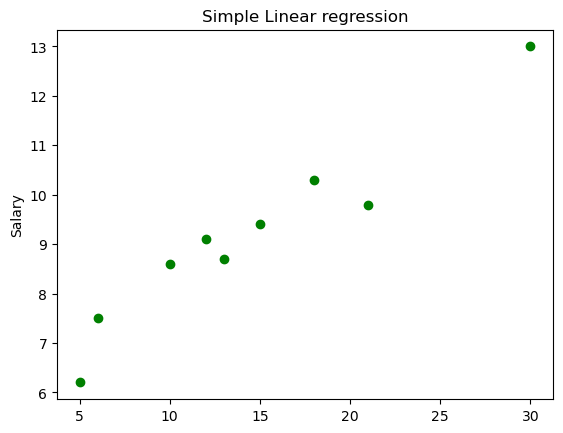

In [3]:
plt.scatter(tbl2['Experience'],tbl2['Salary'],color="green")
plt.ylabel('Salary')
plt.title('Simple Linear regression')

In [8]:
from statsmodels.formula.api import ols
reg2=ols(formula="Salary ~ Experience",data=tbl2)
fit2=reg2.fit()
print(fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     87.61
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           3.30e-05
Time:                        19:37:11   Log-Likelihood:                -6.2491
No. Observations:                   9   AIC:                             16.50
Df Residuals:                       7   BIC:                             16.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8093      0.404     14.386      0.0

C:\Users\abppa\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [9]:
influence=fit2.get_influence()
resid_student=influence.resid_studentized_external

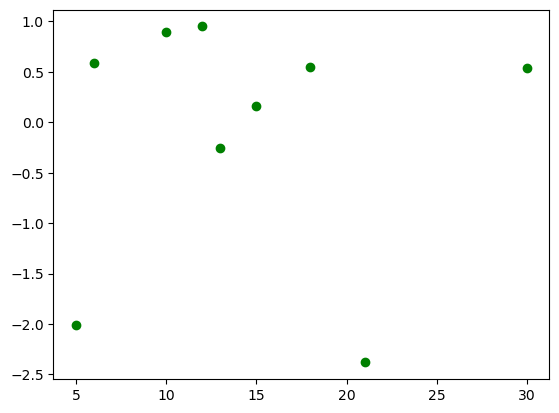

In [10]:
plt.figure()
plt.scatter(tbl2['Experience'],resid_student,color="green")

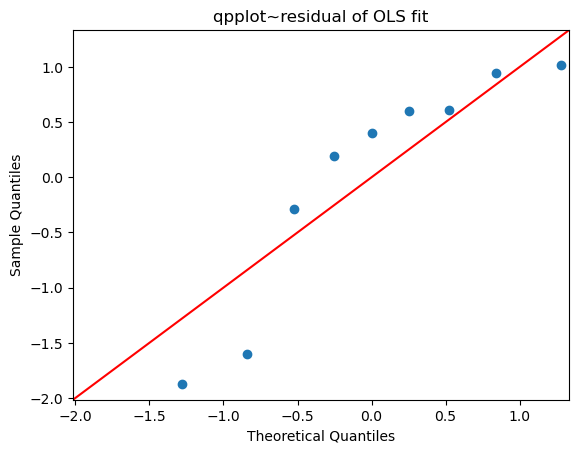

In [11]:
res=fit2.resid
probplot=s.ProbPlot(res,stats.norm,fit=True)
fig=probplot.qqplot(line='45')
h=plt.title('qpplot~residual of OLS fit')
plt.show()

In [12]:
just_dummies2=pd.get_dummies(tbl2['Gender'])
just_dummies2

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0


In [13]:
step_2=pd.concat([tbl2,just_dummies2],axis=1)
step_2.drop(['Gender','Male'],inplace=True,axis=1)

In [14]:
result=s.OLS(step_2['Salary'],s.add_constant(step_2[['Female']])).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.8426
Date:                Thu, 30 Mar 2023   Prob (F-statistic):              0.389
Time:                        19:39:06   Log-Likelihood:                -17.455
No. Observations:                   9   AIC:                             38.91
Df Residuals:                       7   BIC:                             39.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7000      0.853     11.367      0.0

C:\Users\abppa\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [15]:
result=s.OLS(step_2['Salary'],s.add_constant(step_2[['Female','Experience']])).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     111.6
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           1.80e-05
Time:                        19:39:23   Log-Likelihood:                -1.5752
No. Observations:                   9   AIC:                             9.150
Df Residuals:                       6   BIC:                             9.742
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2485      0.291     21.439      0.0

C:\Users\abppa\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [16]:
step_2=pd.concat([tbl2,just_dummies2],axis=1)
step_2.drop(['Gender','Female'],inplace=True,axis=1)
result=s.OLS(step_2['Salary'],s.add_constant(step_2[['Male']])).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.8426
Date:                Thu, 30 Mar 2023   Prob (F-statistic):              0.389
Time:                        19:39:43   Log-Likelihood:                -17.455
No. Observations:                   9   AIC:                             38.91
Df Residuals:                       7   BIC:                             39.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5250      0.954      8.935      0.0

C:\Users\abppa\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
